# Problème de complexité 
## Fonction kernel.covWithX($\xi$)

C'est une fonction qui renvoie un vecteur de covariance entre tous les pixels $x_i$ et un pixel $\xi$

return : 
$$
\begin{pmatrix}
  k^{\omega}(x_1,\xi) \\
  k^{\omega}(x_2,\xi) \\
  \vdots \\
  k^{\omega}(x_N,\xi) \\
\end{pmatrix}
$$

Avec $N$ le nombre de pixels ici $N = 350^2 = 122500 $

### fonction $k^{\omega}(\alpha,\beta)$

$\alpha$ et $\beta$ des pixels

$$ k^{\omega}(\alpha,\beta) = \sum_{i=1}^{N}{k(\alpha,x_i)\omega(x_i)k(x_i,\beta)}$$

### fonction $k$ : RBF Kernel

$$ k(x,y) = e^{-d(x,y)^2/(2l^2)} $$

###  calculer la matrice de covariance K ? 

$$ (K)_{i,j} = e^{-d(x,y)^2/(2l^2)} $$

matrice symmétrique --> On calcule uniqment la moitié
l petit $\approx$ 5pixel --> k(x,y) très faible quand les deux pixels sont éloignées

#### Idée 
- Calculer la motié de K 
- en approximant $k(x,y) = 0$ si $d(x,y) > r$  avec $r$ un rayon limite 
- enregistrer la matrice avec matrix.sparce de scipy 



In [60]:
from FeaturesExtractor.misc import *
import numpy as np
import matplotlib.pyplot as plt

#Image aléatoire
l_side = 350
N = l_side*l_side
img = np.random.randn(l_side,l_side)

#Vecteur des coordonnées
Xvec = XVecFromArray(img)

In [61]:
def RBF(a:np.ndarray,b:np.ndarray,l:float,threshold:float):
    xa,ya = a
    xb,yb = b
    d2 = (xa-xb)**2 + (ya-yb)**2
    return np.exp(-d2/(2*l**2))
    

In [82]:
## TEST RBF
x = np.array([0,0])
y = np.array([40,20])
l = 1
threshold = 0

print(RBF(x,y,l,threshold))


0.0


In [65]:
from scipy import sparse as s
import time

#Creation de la matrice
M = s.lil_matrix((N,N))

#print(M.toarray())
#Unable to allocate 125. GiB for an array with shape (129600, 129600) and data type float64


In [78]:
l = 1
threshold = 0

l_side = 120
N = l_side*l_side
M = s.lil_matrix((N,N))


start = time.time()
for i in range(N):
    for j in range(i,N):
        x = Xvec[i]
        y = Xvec[j]
        M[i,j] = RBF(x,y,l,threshold)
                
dt = time.time() -start
        

In [79]:
print("l_side: ",l_side)
print("taille: ",M.data.nbytes)
print("temps : ",dt)

l_side:  120
taille:  115200
temps :  648.013454914093


In [97]:
A = np.array([[100,1],
             [120,1]])
B = np.array([5.75335,6.47389])

X = np.linalg.solve(A,B)
print(X)

[0.036027 2.15065 ]


In [98]:
a = X[0]
b = X[1]
print(a,b)

0.03602699999999999 2.150650000000001


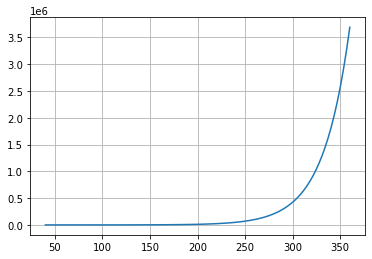

In [100]:
L_x = np.linspace(40,360,100)
Y = np.exp(b)*np.exp(L_x*a)

plt.plot(L_x,Y)
plt.grid()
plt.show()